# K-means clustering algorithm for anomaly detection

Consider the example below of how to use the **K-means clustering** algorithm for anomaly detection. We will use a synthetic dataset representing financial transactions, where each transaction is characterized by two features: 

- Amount (transaction amount) and
- Duration (transaction duration in minutes).

The goal is to identify transactions that are anomalies, i.e., significantly different from the norm.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Set random seed for reproducibility
np.random.seed(42)

## Step 1: Generate Synthetic Data

For simplicity, let's generate a synthetic dataset with two clusters representing normal transactions and a few outliers representing anomalous transactions.

In [5]:
# Generate synthetic data for normal transactions
normal_transactions = np.random.normal(loc=[100, 30], scale=[20, 10], size=(200, 2))

# Generate synthetic data for anomalous transactions
anomalous_transactions = np.array([[250, 60], [300, 70], [350, 80]])

# Combine the data and create a DataFrame
data = np.vstack([normal_transactions, anomalous_transactions])
df = pd.DataFrame(data, columns=['Amount', 'Duration'])

In [6]:
df

,Amount,Duration
0,118.765676,24.839553
1,101.922416,25.377247
2,91.310075,26.908279
3,104.442675,25.212514
4,125.115123,21.053927
...,...,...
198,99.607244,35.524900
199,104.478283,43.641404
200,250.000000,60.000000
201,300.000000,70.000000


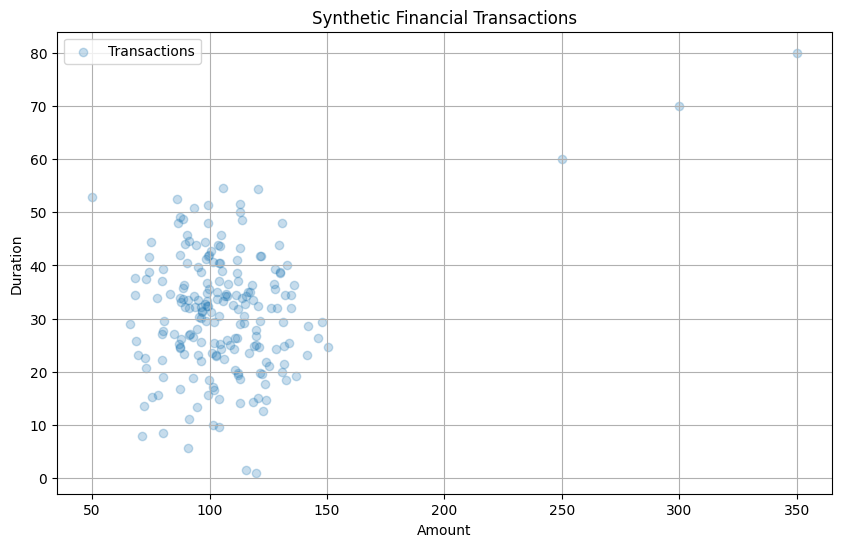

In [14]:
# Plot the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(df['Amount'], df['Duration'], label='Transactions', alpha=0.25)
plt.xlabel('Amount')
plt.ylabel('Duration')
plt.title('Synthetic Financial Transactions')
plt.legend()
plt.grid(True)
plt.show()

## Step 2: Apply K-means Clustering

We'll apply the K-means algorithm to cluster the transactions. The number of clusters (K) is typically determined based on domain knowledge or using techniques like the elbow method. For simplicity, let's assume K=2.

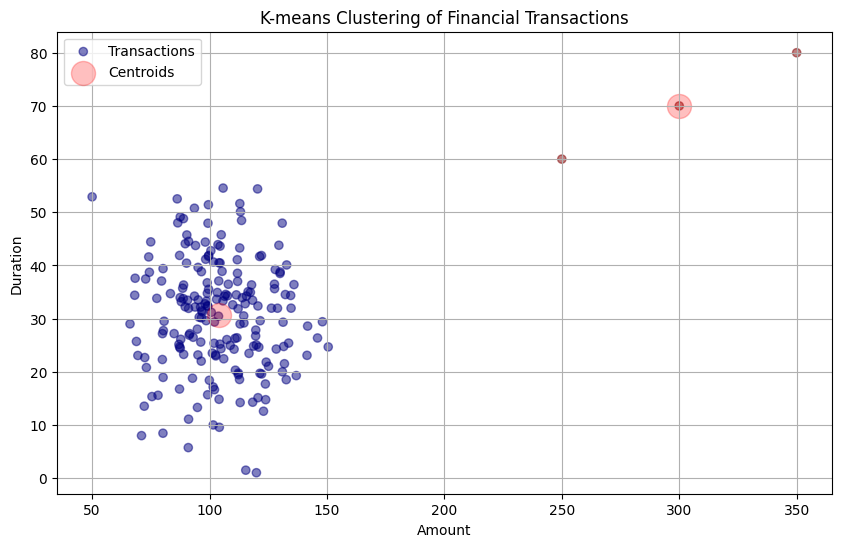

In [43]:
# Define the number of clusters
k = 2            # try different number of clusters here

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Amount', 'Duration']])

# Plot the clustered data
plt.figure(figsize=(10, 6))
plt.scatter(df['Amount'], df['Duration'], c=df['Cluster'], cmap='jet', label='Transactions', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids',alpha=0.25)
plt.xlabel('Amount')
plt.ylabel('Duration')
plt.title('K-means Clustering of Financial Transactions')
plt.legend()
plt.grid(True)
plt.show()

## Step 3: Identify Anomalies

Anomalies are transactions that are far from the centroids of their respective clusters. We can define a distance threshold to identify these anomalies.

Transactions that are far from the cluster centroids are identified as anomalies. This approach can be refined and adapted to real financial datasets for anomaly detection in various contexts, such as fraud detection, risk management, and transaction monitoring.

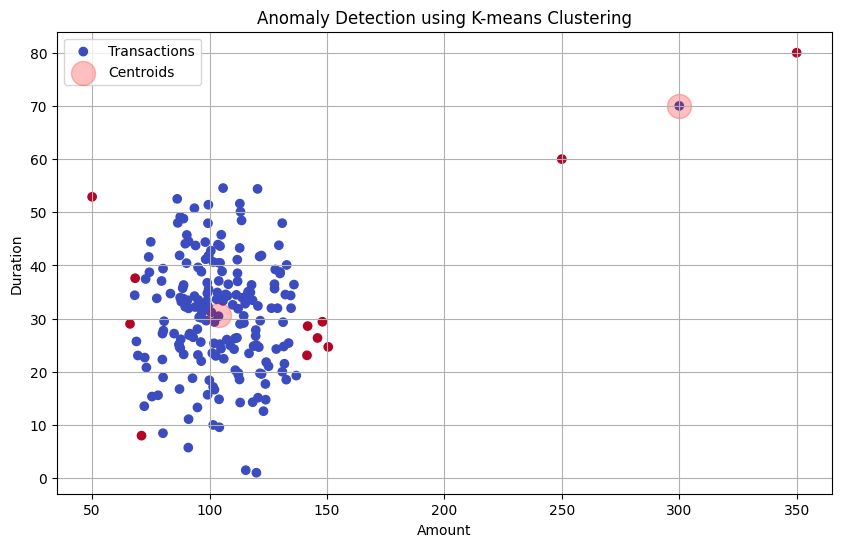

In [44]:
# Calculate the distance of each transaction from its cluster centroid
distances = cdist(df[['Amount', 'Duration']], kmeans.cluster_centers_, metric='euclidean')
df['Distance'] = np.min(distances, axis=1)

# Define a threshold for anomalies (e.g., 95th percentile of distances)
threshold = np.percentile(df['Distance'], 95)

# Mark transactions as anomalies if their distance exceeds the threshold
df['Anomaly'] = df['Distance'] > threshold

# Plot the anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df['Amount'], df['Duration'], c=df['Anomaly'], cmap='coolwarm', label='Transactions')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids',alpha=0.25)
plt.xlabel('Amount')
plt.ylabel('Duration')
plt.title('Anomaly Detection using K-means Clustering')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
df

,Amount,Duration,Cluster,Distance,Anomaly
0,118.765676,24.839553,0,15.868457,False
1,101.922416,25.377247,0,5.639381,False
2,91.310075,26.908279,0,13.212417,False
3,104.442675,25.212514,0,5.430714,False
4,125.115123,21.053927,0,23.192609,False
...,...,...,...,...,...
198,99.607244,35.524900,0,6.574006,False
199,104.478283,43.641404,0,13.026331,False
200,250.000000,60.000000,1,50.990195,True
201,300.000000,70.000000,1,0.000000,False


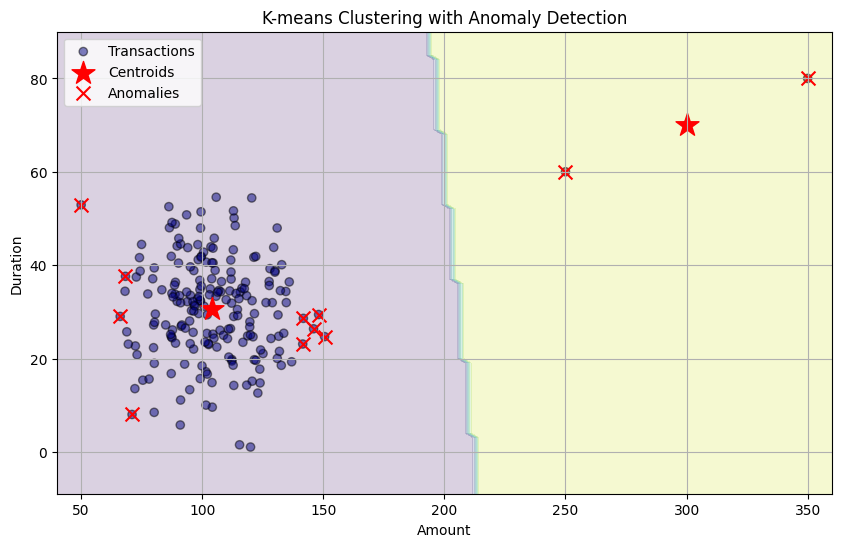

In [47]:
# Create a meshgrid for plotting decision boundaries
x_min, x_max = df['Amount'].min() - 10, df['Amount'].max() + 10
y_min, y_max = df['Duration'].min() - 10, df['Duration'].max() + 10
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict cluster labels for each point in the mesh
mesh_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['Amount', 'Duration'])
Z = kmeans.predict(mesh_data)
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')

# Plot the clustered data
plt.scatter(df['Amount'], df['Duration'], c=df['Cluster'], cmap='jet', edgecolor='k', label='Transactions', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')

# Highlight anomalies
anomalies = df[df['Anomaly']]
plt.scatter(anomalies['Amount'], anomalies['Duration'], c='red', marker='x', s=100, label='Anomalies')

# Enhancements
plt.xlabel('Amount')
plt.ylabel('Duration')
plt.title('K-means Clustering with Anomaly Detection')
plt.legend()
plt.grid(True)
plt.show()


# 3D

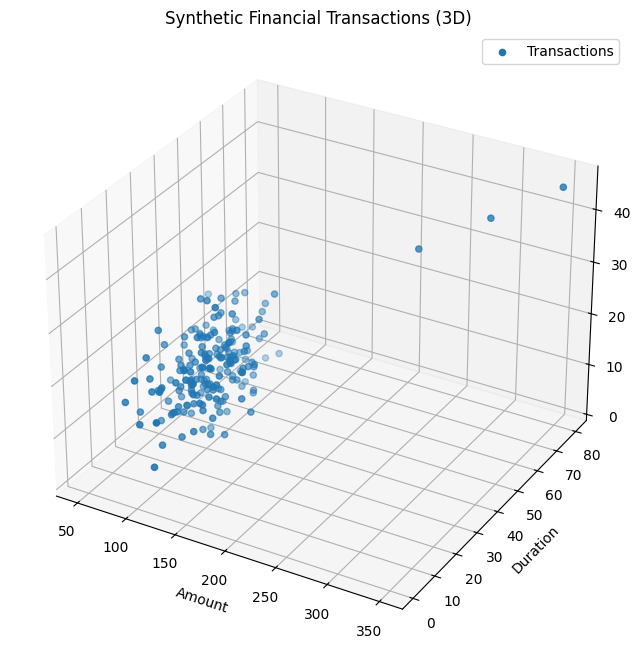

In [48]:
# Generate synthetic data for the third feature (Frequency)
normal_frequency = np.random.normal(loc=15, scale=5, size=200)
anomalous_frequency = np.array([35, 40, 45])

# Combine the data for the third feature
frequency_data = np.concatenate([normal_frequency, anomalous_frequency])
df['Frequency'] = frequency_data

# 3D plot of the synthetic data
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Amount'], df['Duration'], df['Frequency'], label='Transactions')
ax.set_xlabel('Amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Frequency')
ax.set_title('Synthetic Financial Transactions (3D)')
plt.legend()
plt.show()


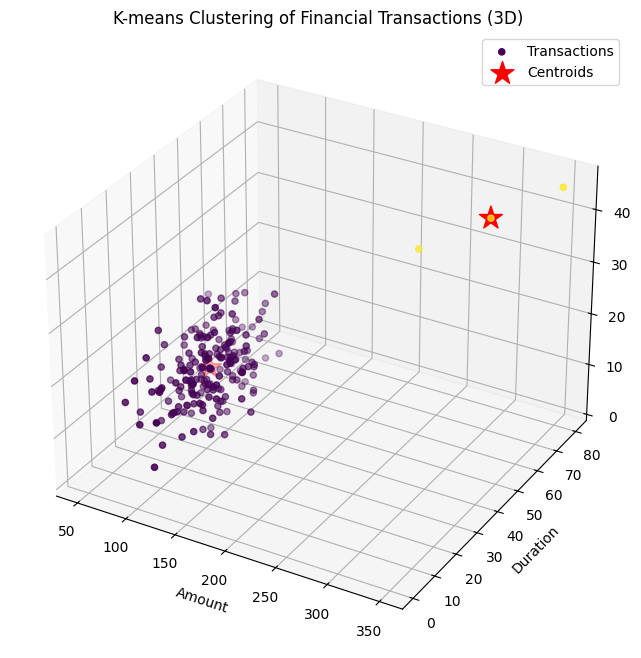

In [49]:
# Apply K-means clustering
kmeans_3d = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans_3d.fit_predict(df[['Amount', 'Duration', 'Frequency']])

# 3D plot of the clustered data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Amount'], df['Duration'], df['Frequency'], c=df['Cluster'], cmap='viridis', label='Transactions')
ax.scatter(kmeans_3d.cluster_centers_[:, 0], kmeans_3d.cluster_centers_[:, 1], kmeans_3d.cluster_centers_[:, 2], s=300, c='red', marker='*', label='Centroids')
ax.set_xlabel('Amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Frequency')
ax.set_title('K-means Clustering of Financial Transactions (3D)')
plt.legend()
plt.show()

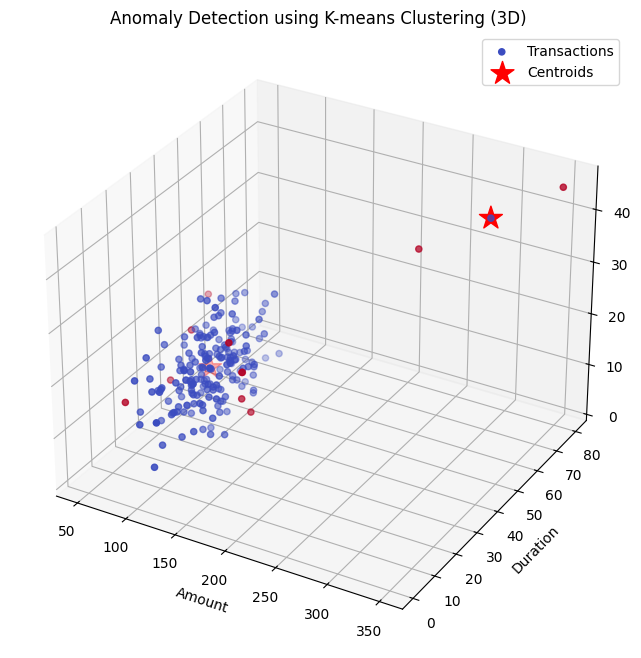

In [50]:
# Calculate the distance of each transaction from its cluster centroid
distances_3d = cdist(df[['Amount', 'Duration', 'Frequency']], kmeans_3d.cluster_centers_, metric='euclidean')
df['Distance'] = np.min(distances_3d, axis=1)

# Define a threshold for anomalies (e.g., 95th percentile of distances)
threshold_3d = np.percentile(df['Distance'], 95)

# Mark transactions as anomalies if their distance exceeds the threshold
df['Anomaly'] = df['Distance'] > threshold_3d

# 3D plot of the anomalies
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Amount'], df['Duration'], df['Frequency'], c=df['Anomaly'], cmap='coolwarm', label='Transactions')
ax.scatter(kmeans_3d.cluster_centers_[:, 0], kmeans_3d.cluster_centers_[:, 1], kmeans_3d.cluster_centers_[:, 2], s=300, c='red', marker='*', label='Centroids')
ax.set_xlabel('Amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Frequency')
ax.set_title('Anomaly Detection using K-means Clustering (3D)')
plt.legend()
plt.show()

In [51]:
import plotly.express as px
import plotly.graph_objects as go

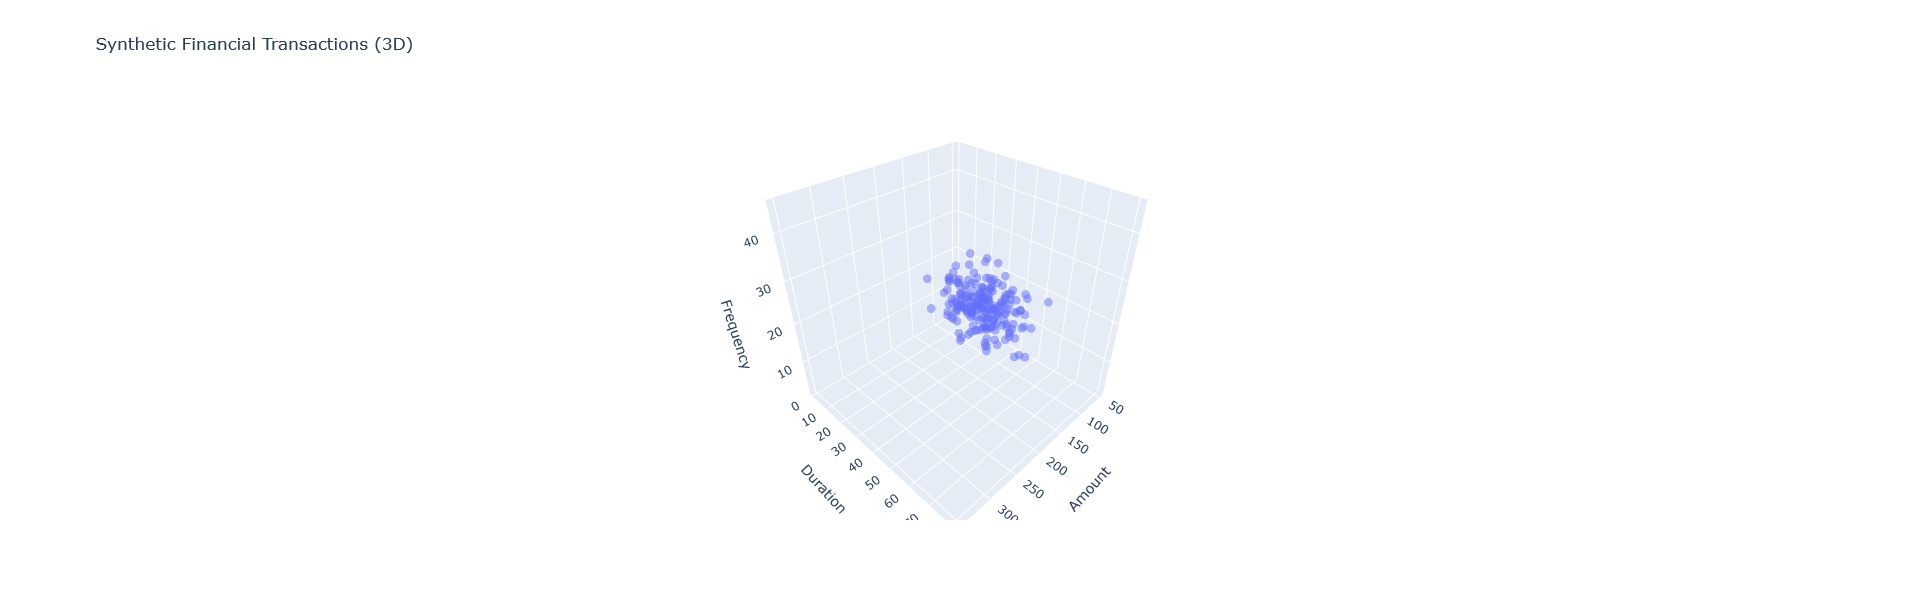

In [65]:
fig = px.scatter_3d(df, x='Amount', y='Duration', z='Frequency', 
                    title='Synthetic Financial Transactions (3D)',
                    opacity=0.5)
fig.update_traces(marker=dict(size=5))
fig.update_layout(width=800, height=600)  # Adjust width and height as needed
fig.show()

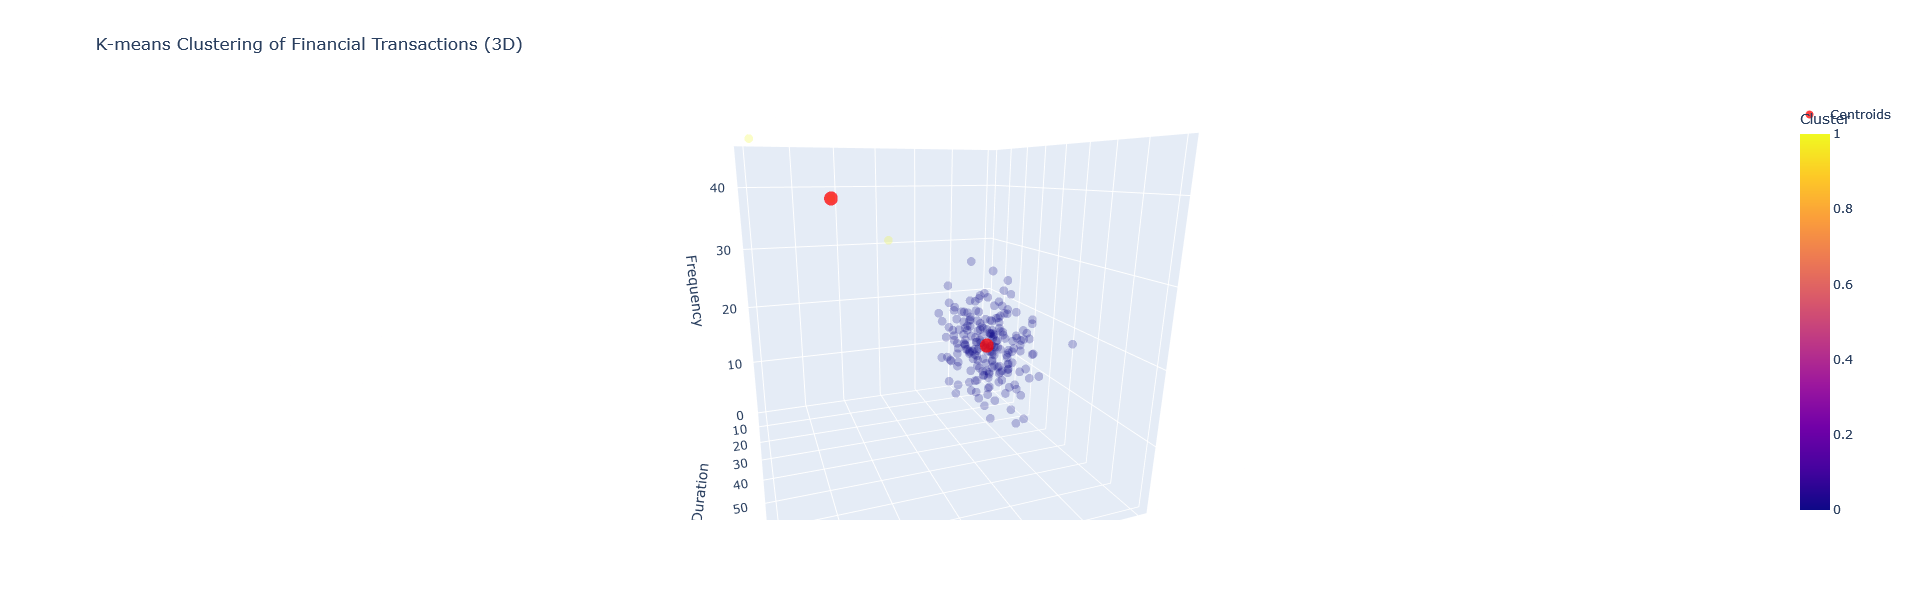

In [63]:
fig = px.scatter_3d(df, x='Amount', y='Duration', z='Frequency', 
                    color='Cluster', 
                    title='K-means Clustering of Financial Transactions (3D)',
                    opacity=0.25)
fig.update_traces(marker=dict(size=5))
fig.update_layout(width=800, height=600)  # Adjust width and height as needed
fig.add_trace(
    go.Scatter3d(x=kmeans_3d.cluster_centers_[:, 0], y=kmeans_3d.cluster_centers_[:, 1], z=kmeans_3d.cluster_centers_[:, 2], 
                 mode='markers', 
                 marker=dict(size=8, color='red', opacity=0.75), 
                 name='Centroids'))
fig.show()

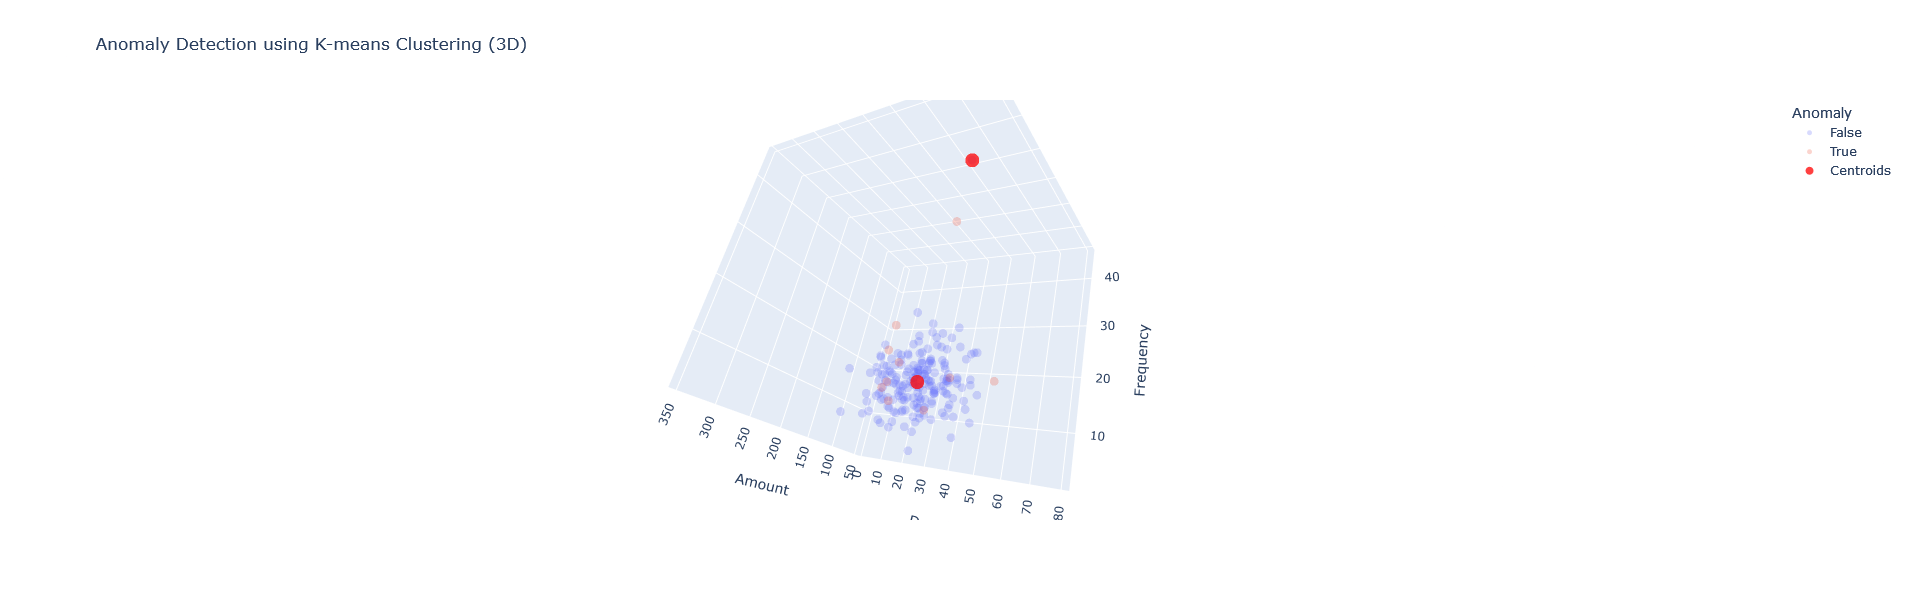

In [64]:
fig = px.scatter_3d(df, x='Amount', y='Duration', z='Frequency', 
                    color='Anomaly', 
                    title='Anomaly Detection using K-means Clustering (3D)',
                    opacity=0.25)
fig.update_traces(marker=dict(size=5))
fig.update_layout(width=800, height=600)  # Adjust width and height as needed
fig.add_trace(
    go.Scatter3d(x=kmeans_3d.cluster_centers_[:, 0], y=kmeans_3d.cluster_centers_[:, 1], z=kmeans_3d.cluster_centers_[:, 2], 
                 mode='markers', 
                 marker=dict(size=8, color='red', opacity=0.75), 
                 name='Centroids'))
fig.show()

## Adding 2D projections

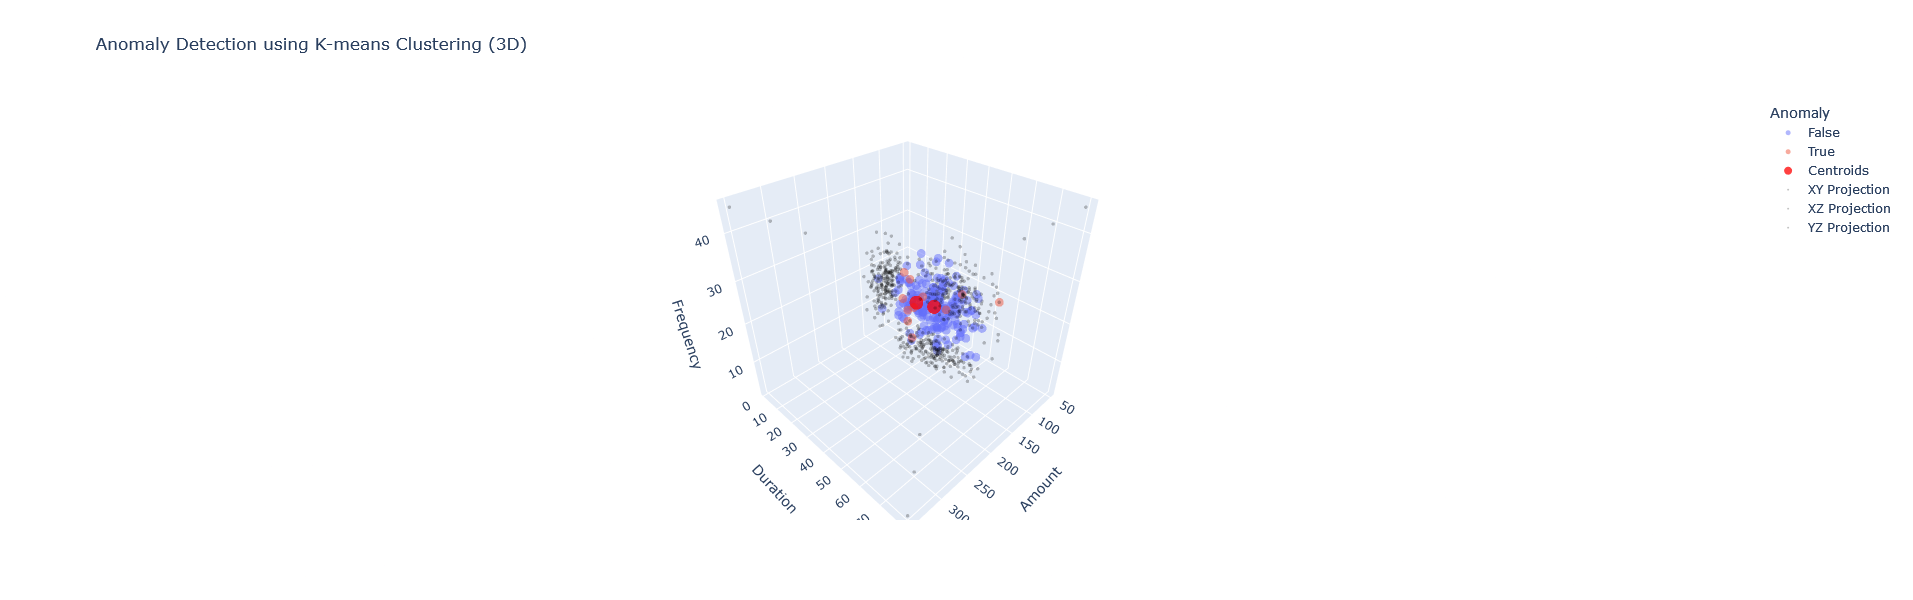

In [70]:
fig = px.scatter_3d(df, x='Amount', y='Duration', z='Frequency', 
                    color='Anomaly', 
                    title='Anomaly Detection using K-means Clustering (3D)',
                    opacity=0.5)
fig.update_traces(marker=dict(size=5))
fig.update_layout(width=800, height=600)  # Adjust width and height as needed
fig.add_trace(
    go.Scatter3d(x=kmeans_3d.cluster_centers_[:, 0], y=kmeans_3d.cluster_centers_[:, 1], z=kmeans_3d.cluster_centers_[:, 2], 
                 mode='markers', 
                 marker=dict(size=8, color='red', opacity=0.75), 
                 name='Centroids'))
# The code above is the same as in the previous example. The new part is added below:

# Add 2D scatter projections onto the planes
# XY plane projection (set z to a constant, e.g., the minimum value of z-axis)
fig.add_trace(
    go.Scatter3d(x=df['Amount'], y=df['Duration'], z=np.full(df.shape[0], df['Frequency'].min()), 
                 mode='markers', name='XY Projection',
                 marker=dict(color=df['Anomaly'], size=2, opacity=0.25)))

# XZ plane projection (set y to a constant, e.g., the minimum value of y-axis)
fig.add_trace(
    go.Scatter3d(x=df['Amount'], y=np.full(df.shape[0], df['Duration'].min()), z=df['Frequency'], 
                 mode='markers', name='XZ Projection',
                 marker=dict(color=df['Anomaly'], size=2, opacity=0.25)))

# YZ plane projection (set x to a constant, e.g., the minimum value of x-axis)
fig.add_trace(
    go.Scatter3d(x=np.full(df.shape[0], df['Amount'].min()), y=df['Duration'], z=df['Frequency'], 
                 mode='markers', name='YZ Projection',
                 marker=dict(color=df['Anomaly'], size=2, opacity=0.25)))

fig.show()